# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Marcel Ryan Antony
- **Email:** marcelryann26@gmail.com
- **ID Dicoding:** marcel_ryan_AXhM

## Menentukan Pertanyaan Bisnis

- Apa perbedaan yang terdapat pada kualitas udara antar lokasi dan antar waktu serta mengapa?
- Faktor-faktor apa saja yang berperan dalam kualitas udara, dan bagaimana faktor-faktor tersebut saling berhubungan?

## Import Semua Packages/Library yang Digunakan

In [23]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import folium
import warnings

## Data Wrangling

### Gathering Data

In [24]:
# Directory to the data files
data_folder = 'data/'

# List all files in the directory
file_list = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

# Initialize an empty list to store all the data
data = []

# Loop through each file, and append each data in the file to the list
for file in file_list:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)
    data.append(df)

# Create a dataframe based on the data
air_quality = pd.concat(data, ignore_index=True)

# Check if the data is merged correctly
air_quality

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [25]:
# Check the year range of the data
air_quality['year'].value_counts()

year
2016    105408
2014    105120
2015    105120
2013     88128
2017     16992
Name: count, dtype: int64

**Insight:**
- There are 420 thousand rows of data for air quality based on the stations located in Chine
- The data ranges from year 2013 to year 2017

### Assessing Data

**Check for null values in the dataset**

In [26]:
print(f"Null values in the datasets:\n{air_quality.isnull().sum()}")

Null values in the datasets:
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


**Checking for duplicated values in the dataset**

In [27]:
print(f"Duplicated values in the datasets: {air_quality.duplicated().sum()} rows")

Duplicated values in the datasets: 0 rows


**Checking for outliers in numerical columns in the datasets**

In [28]:
# Function to detect outliers using the IQR method
def count_outliers_iqr(column):
    Q1 = air_quality[column].quantile(0.25)
    Q3 = air_quality[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print the sum of the outliers
    outliers = (air_quality[column] < lower_bound) | (air_quality[column] > upper_bound)

    print(f"There are {outliers.sum()} outliers in the {column} column")

# Loop through all the numeric columns
for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']:
  count_outliers_iqr(col)

There are 19142 outliers in the PM2.5 column
There are 14658 outliers in the PM10 column
There are 35566 outliers in the SO2 column
There are 7021 outliers in the NO2 column
There are 28054 outliers in the CO column
There are 16599 outliers in the O3 column
There are 0 outliers in the TEMP column
There are 0 outliers in the PRES column
There are 0 outliers in the DEWP column
There are 16520 outliers in the RAIN column
There are 23079 outliers in the WSPM column


**Insight:**
- There are many columns with null values which is the column PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM
- There are no duplicate values in the dataset
- There are many columns with outliers which is the column PM2.5, PM10, SO2, NO2, CO, O3, RAIN, and WSPM

### Cleaning Data

**Imputing the null values with median because for the column that have many null values and dropping null values for column with a little null values**

In [29]:
# Median Imputation for column with null values
for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    air_quality[col].fillna(air_quality[col].median(), inplace=True)

print(f"Rows before dropping nulls: {len(air_quality)}")

# Dropping the null values for column with a little null values
air_quality = air_quality.dropna(subset=['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'wd'])

# Display the number of rows remaining after dropping nulls
print(f"Rows remaining after dropping nulls: {len(air_quality)}")
print(f"Missing values after dropping rows:")
print(air_quality.isnull().sum())

Rows before dropping nulls: 420768
Rows remaining after dropping nulls: 418858
Missing values after dropping rows:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


**Impute outliers for each column that have outliers with its mean**

In [30]:
def impute_outliers_with_mean(column):
    # Calculate the IQR
    Q1 = air_quality[column].quantile(0.25)
    Q3 = air_quality[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the mean
    mean_value = air_quality[column].mean()
    air_quality.loc[(air_quality[column] < lower_bound) | (air_quality[column] > upper_bound), column] = mean_value

# Apply mean imputation to pollutant and other relevant columns
for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM']:
 impute_outliers_with_mean(col)

# Check the results
print("Outliers replaced with mean values.")

Outliers replaced with mean values.


**Insight:**
- The rows of dataset changed to 418858 after the null values are dropped
- The outliers for the column that have outliers are replace with the column's mean

## Exploratory Data Analysis (EDA)

  **Exploring the statistics parameter of the dataset**

In [31]:
air_quality.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000
mean,17485.092955,2014.657039,6.524610,15.722273,11.502722,67.264980,93.659120,10.650366,48.169159,996.186888,49.720180,13.562796,1010.732098,2.493081,0.002540,1.540634
std,10110.297282,1.175590,3.444962,8.801802,6.916863,55.172154,68.654961,9.651395,30.635740,629.764084,41.875118,11.434838,10.475351,13.800842,0.012557,0.876870
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,8730.000000,2014.000000,4.000000,8.000000,6.000000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.200000,1002.200000,-8.900000,0.000000,0.900000
50%,17474.000000,2015.000000,7.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26236.000000,2016.000000,10.000000,23.000000,17.000000,95.000000,133.000000,15.654468,67.000000,1212.680302,73.000000,23.300000,1019.000000,15.100000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,241.000000,306.000000,43.000000,139.000000,3000.000000,182.000000,41.600000,1042.800000,29.100000,0.064609,4.100000


**Exploring the data distribution in the dataset**

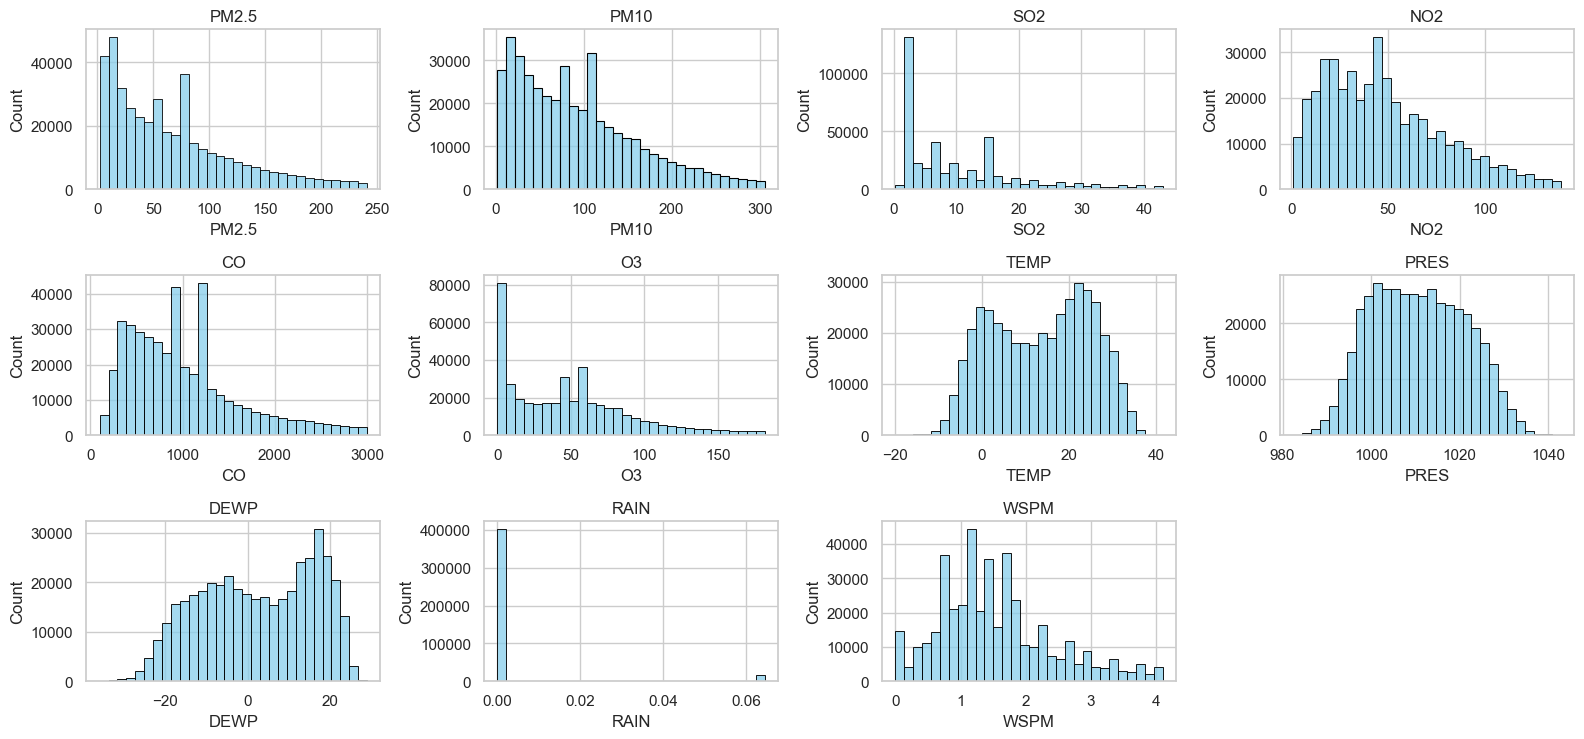

In [32]:
# Set a style for the plot
sns.set(style="whitegrid")

# Columns that are not needed in the histogram plotting
exclude_columns = ['No', 'year', 'month', 'day', 'hour', 'station', 'wd']

columns_to_plot = [col for col in air_quality.columns if col not in exclude_columns]

# Define the size of the plot
plt.figure(figsize=(16, 12))

# Loop through each column and plot a histogram
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 4, i)
    sns.histplot(air_quality[column], kde=False, bins=30, color="skyblue", edgecolor="black")
    plt.title(column)
    plt.tight_layout()

plt.show()

**Check the correlation between each column in the dataset**

In [33]:
air_quality.corr(numeric_only=True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.969515,0.044123,0.016998,0.000981,-0.068406,-0.085494,-0.163905,-0.053906,-0.057667,-0.053570,-0.120081,0.186804,-0.101572,0.007000,0.069810
year,0.969515,1.000000,-0.201156,-0.006425,0.000339,-0.064603,-0.075901,-0.123349,-0.062026,-0.061854,-0.018212,-0.149414,0.185077,-0.164287,-0.004421,0.105166
month,0.044123,-0.201156,1.000000,0.010834,-0.000180,-0.010358,-0.033992,-0.154992,0.035701,0.021521,-0.138568,0.130873,-0.012181,0.265109,0.046998,-0.150334
day,0.016998,-0.006425,0.010834,1.000000,-0.000162,0.000451,0.018288,0.010676,0.013704,-0.006849,-0.010899,0.014430,0.021587,0.022960,-0.006714,0.000958
hour,0.000981,0.000339,-0.000180,-0.000162,1.000000,0.002500,0.049811,0.035811,-0.028017,-0.017261,0.255556,0.142008,-0.038548,-0.012364,-0.003923,0.152128
PM2.5,-0.068406,-0.064603,-0.010358,0.000451,0.002500,1.000000,0.799652,0.380535,0.544792,0.664743,-0.184390,-0.031369,-0.056006,0.199610,-0.027229,-0.237915
PM10,-0.085494,-0.075901,-0.033992,0.018288,0.049811,0.799652,1.000000,0.397221,0.580416,0.593176,-0.157952,-0.022819,-0.070461,0.136236,-0.074880,-0.208491
SO2,-0.163905,-0.123349,-0.154992,0.010676,0.035811,0.380535,0.397221,1.000000,0.421083,0.442058,-0.177309,-0.303368,0.234936,-0.269880,-0.118438,-0.044407
NO2,-0.053906,-0.062026,0.035701,0.013704,-0.028017,0.544792,0.580416,0.421083,1.000000,0.596606,-0.510537,-0.261841,0.170366,-0.021027,-0.070251,-0.365702
CO,-0.057667,-0.061854,0.021521,-0.006849,-0.017261,0.664743,0.593176,0.442058,0.596606,1.000000,-0.350805,-0.198092,0.104024,0.066920,0.009856,-0.287185


**Insight:**
- Based on the code above, the information we can get is the statistics of each of the column in the dataset such as mean, median, std, percentile, etc
- The distribution for the column PM2.5, PM10, SO2, NO2, CO, O3, and WSPM are right skewed
- The distribution for the column DEWP is left skewed
- The distribution for TEMP and PRES column are normal
- The correlation between each of these column PM2.5, PM10, SO2, NO2, CO are strong

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [34]:
# Creating a new column to help in data visualization

# Convert year, month, day, hour into a single datetime
air_quality['datetime'] = pd.to_datetime(air_quality[['year', 'month', 'day', 'hour']])

sns.set(style="whitegrid")

air_quality['datetime']

C:\Users\marce\AppData\Local\Temp\ipykernel_22396\148399943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality['datetime'] = pd.to_datetime(air_quality[['year', 'month', 'day', 'hour']])


0        2013-03-01 00:00:00
1        2013-03-01 01:00:00
2        2013-03-01 02:00:00
3        2013-03-01 03:00:00
4        2013-03-01 04:00:00
                 ...        
420763   2017-02-28 19:00:00
420764   2017-02-28 20:00:00
420765   2017-02-28 21:00:00
420766   2017-02-28 22:00:00
420767   2017-02-28 23:00:00
Name: datetime, Length: 418858, dtype: datetime64[ns]

**Creating a box plot visualization for each pollutant column to see the data distribution**

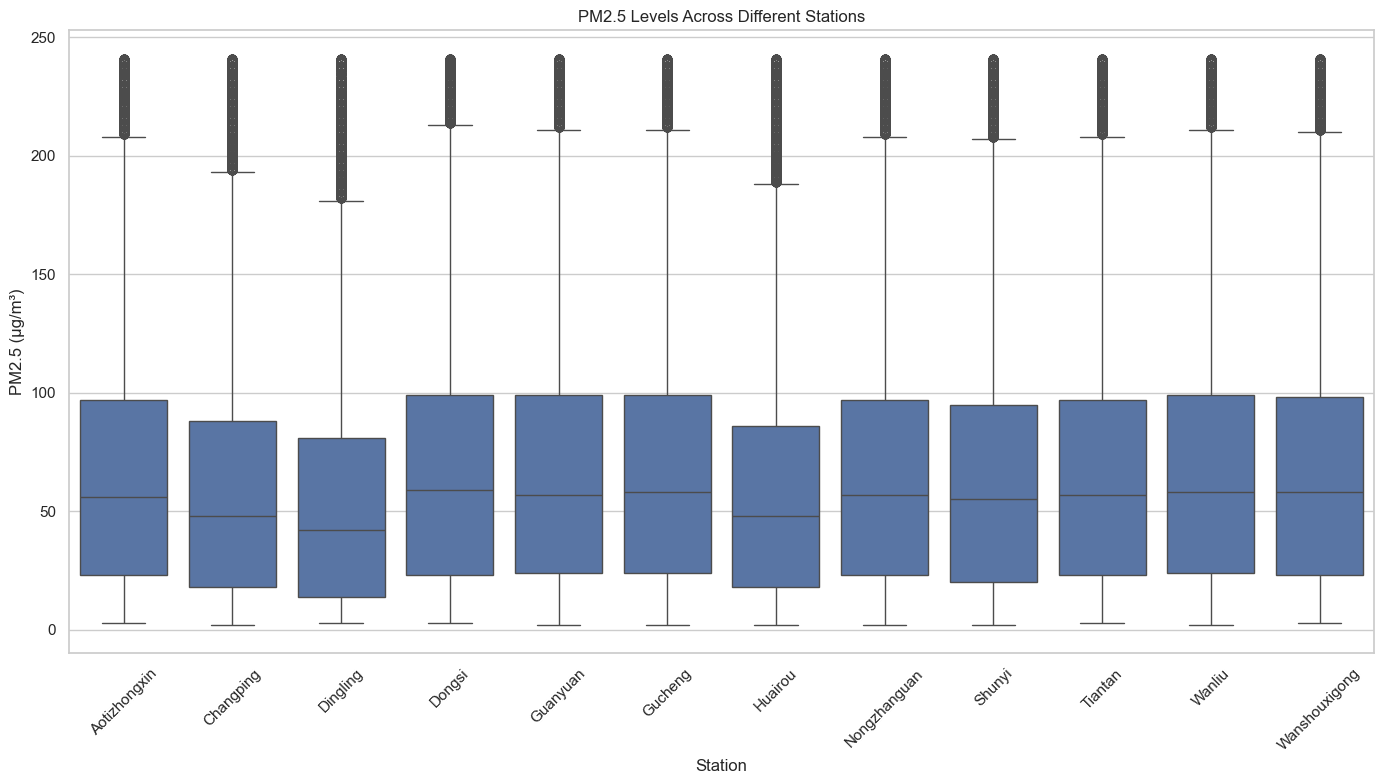

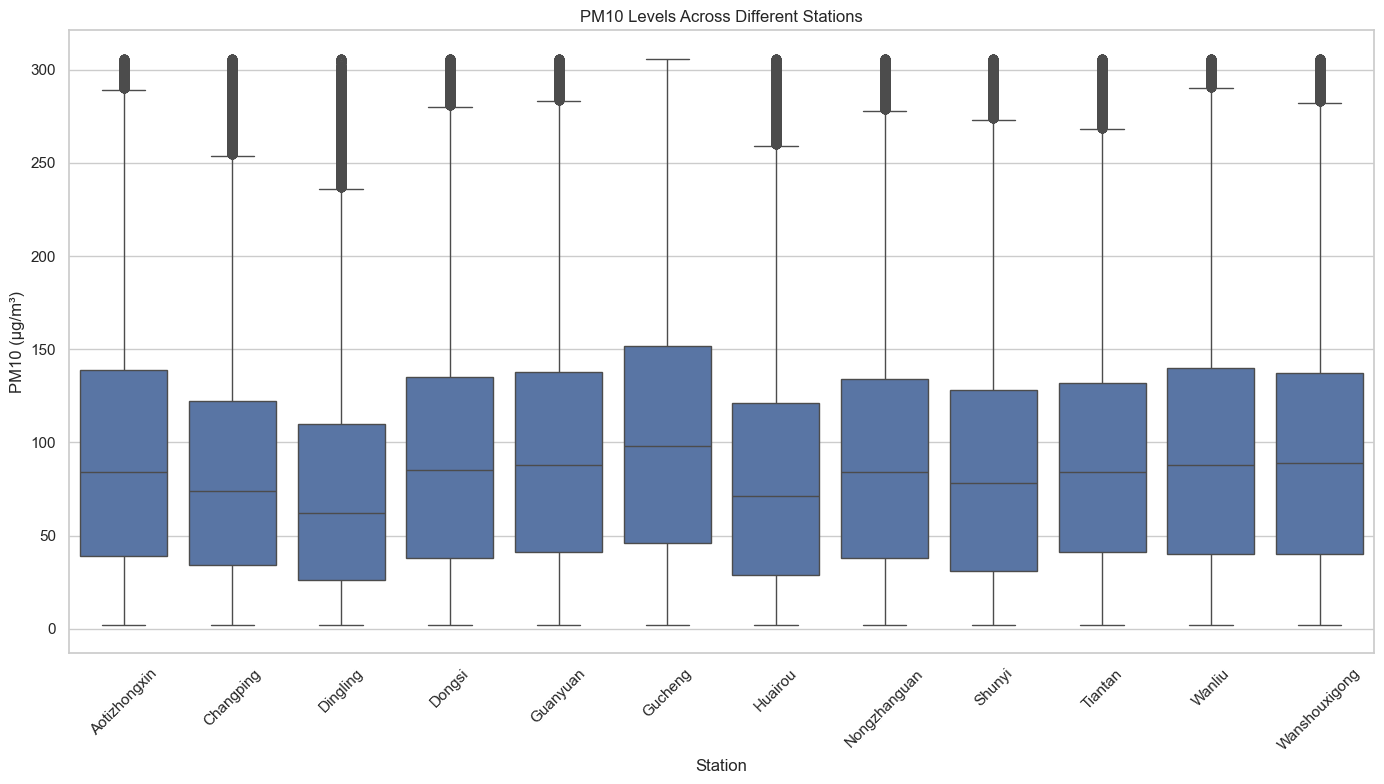

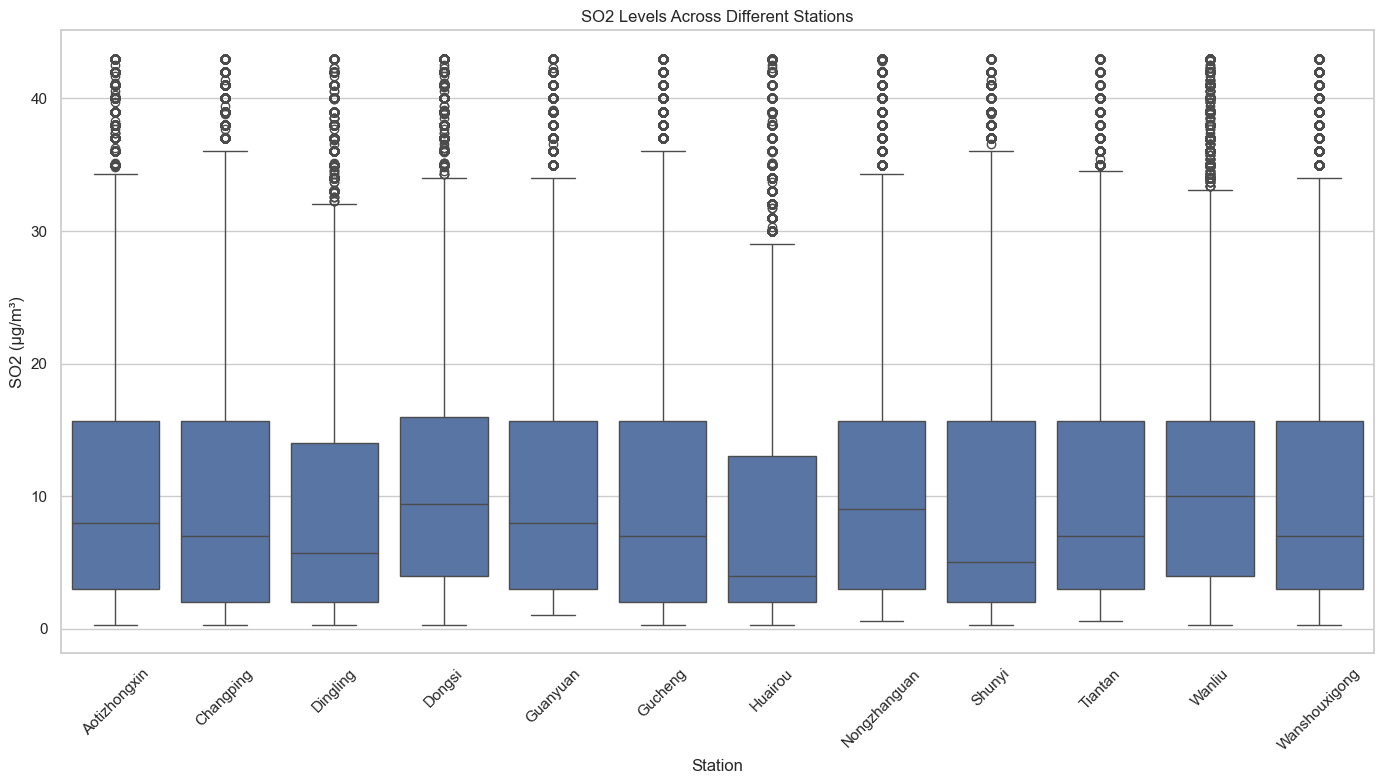

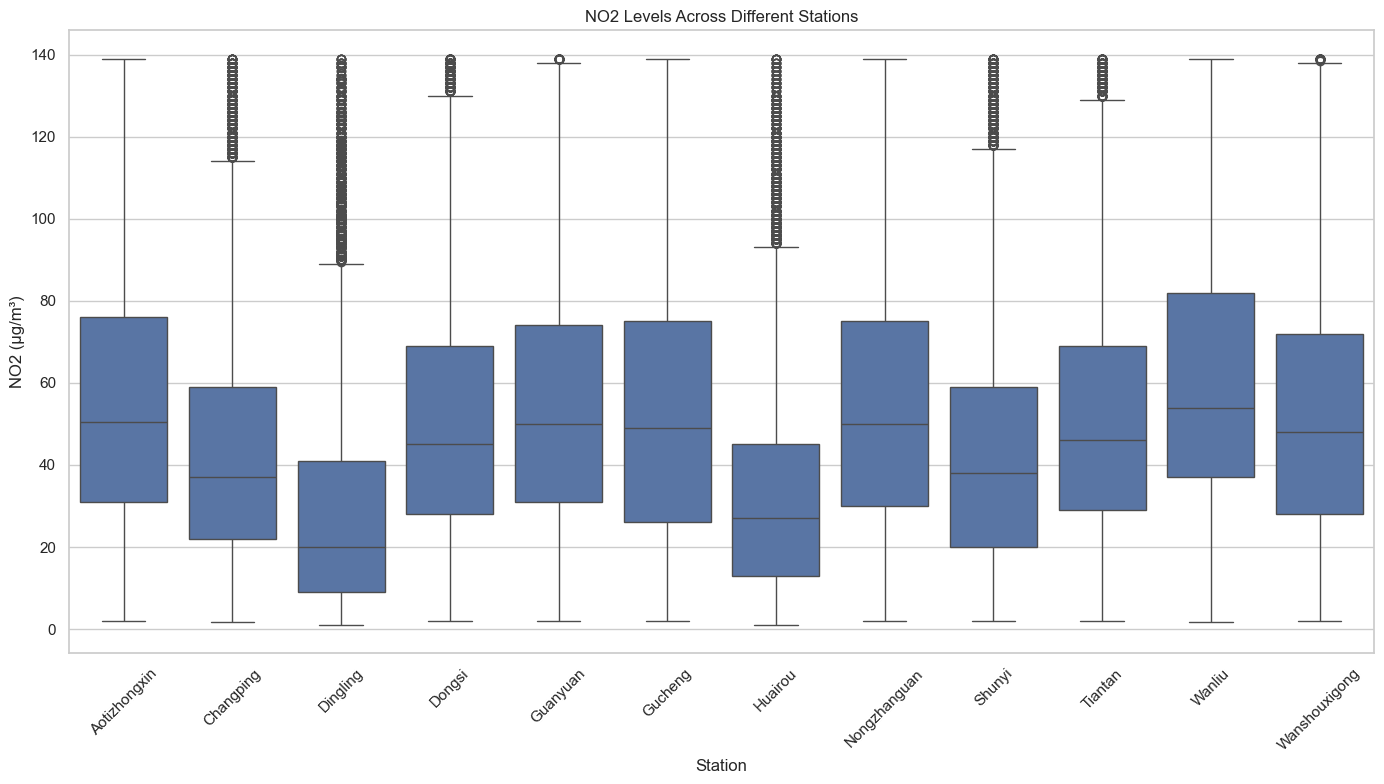

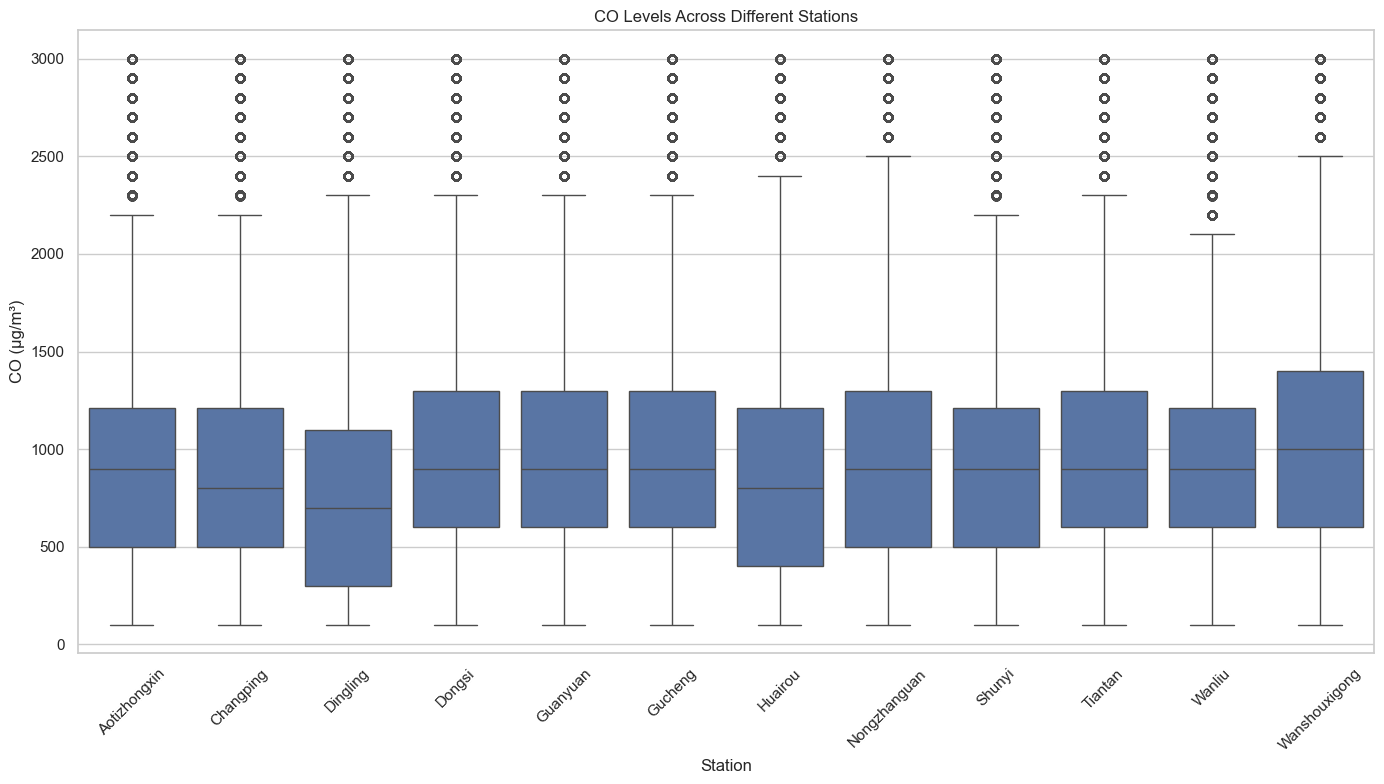

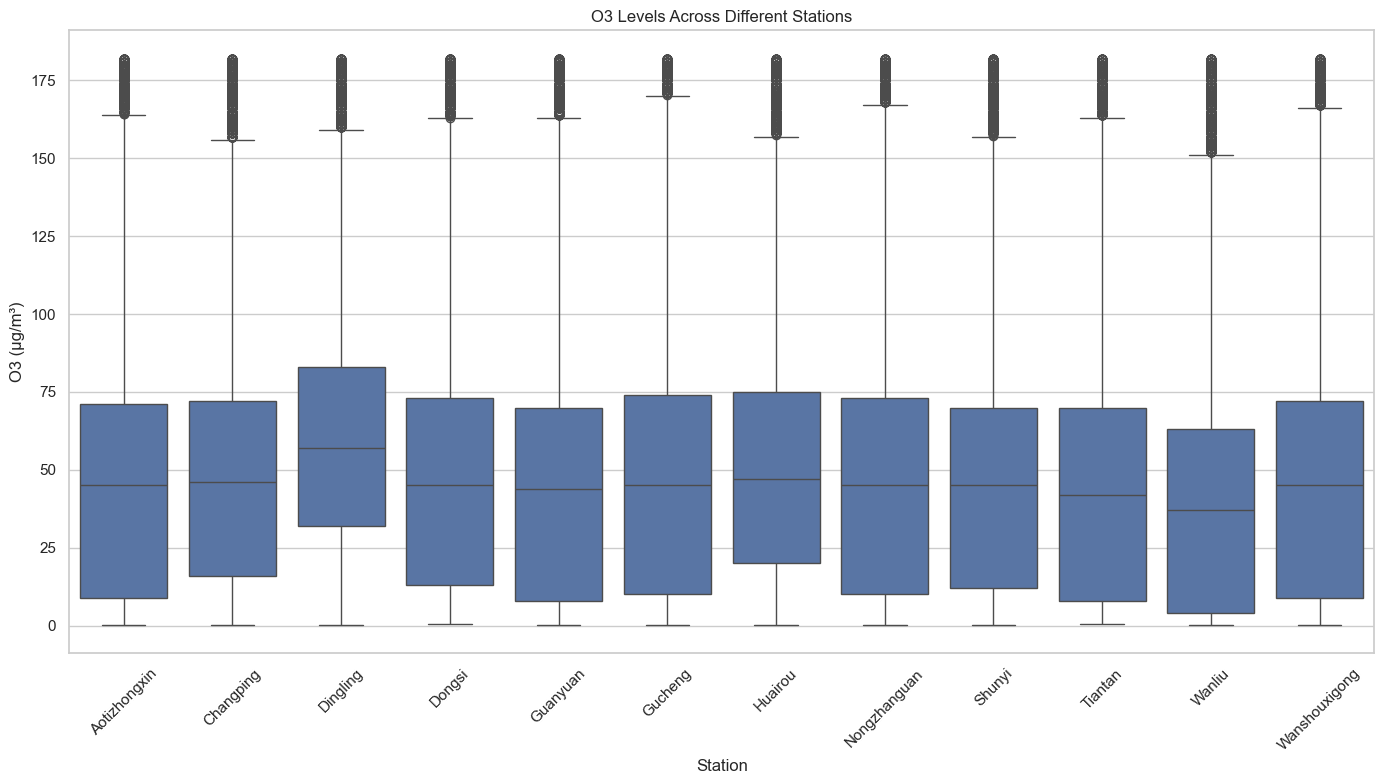

In [35]:
pollutant_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loop through the pollutant columns and create box plots
for pollutant in pollutant_columns:
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=air_quality, x='station', y=pollutant, dodge=False, legend=False)
    plt.title(f'{pollutant} Levels Across Different Stations')
    plt.xlabel('Station')
    plt.ylabel(f'{pollutant} (µg/m³)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Creating a heatmap to see average pollutant levels for each station**

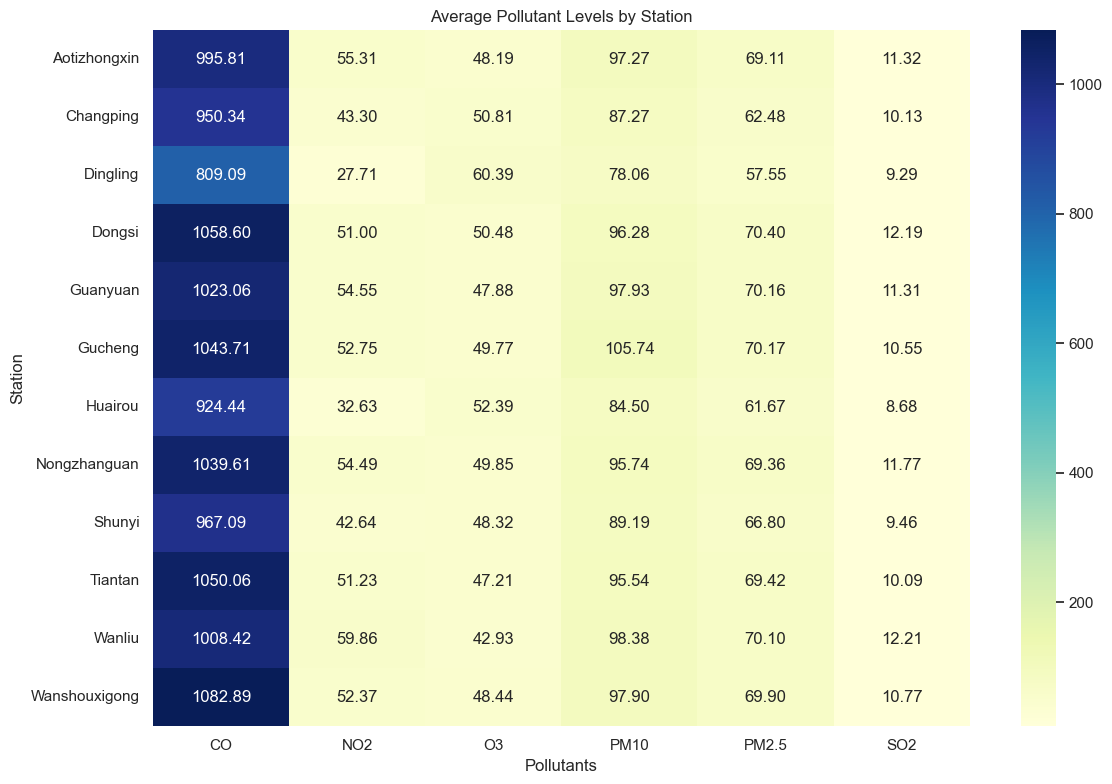

In [36]:
# Create a pivot table to calculate the average pollutant levels at each station
pollutants_avg = air_quality.pivot_table(index='station', values=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'], aggfunc='mean')

# Plot a heatmap of the average pollutant levels across stations
plt.figure(figsize=(12, 8))
sns.heatmap(pollutants_avg, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Average Pollutant Levels by Station')
plt.xlabel('Pollutants')
plt.ylabel('Station')
plt.tight_layout()
plt.show()

**Creating a geomap for each station**

In [37]:
station_coords = {
    'Shunyi': [40.1275, 116.6544],
    'Dingling': [40.2986, 116.2202],
    'Gucheng': [39.9284, 116.1697],
    'Huairou': [40.3288, 116.6318],
    'Guanyuan': [39.9423, 116.3601],
    'Wanliu': [39.9733, 116.3013],
    'Wanshouxigong': [39.8982, 116.3271],
    'Tiantan': [39.8824, 116.4066],
    'Aotizhongxin': [39.9886, 116.3978],
    'Nongzhanguan': [39.9337, 116.4615],
    'Dongsi': [39.9281, 116.4175],
    'Changping': [40.2181, 116.1947]
}

# Convert the dictionary location to a dataframe
station_coords_df = pd.DataFrame.from_dict(station_coords, orient='index', columns=['lat', 'lon'])
station_coords_df['station'] = station_coords_df.index

# Merge the coordinate dataframe to the main dataframe
air_quality = air_quality.merge(station_coords_df, on='station')


In [38]:
# Group by station to calculate the average PM2.5, PM10 levels at each station
pollution_avg = air_quality.groupby('station').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'lat': 'first',
    'lon': 'first'
}).reset_index()

# Create a folium map centered around the approximate location of the stations
m = folium.Map(location=[39.9042, 116.4074], zoom_start=10)

# Add circle markers to the map for each station
for i, row in pollution_avg.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=7,
        popup=f"Station: {row['station']}<br>Average PM2.5: {row['PM2.5']:.2f} µg/m³<br>Average PM10: {row['PM10']:.2f}",
        color='red' if row['PM2.5'] > 100 or row['PM10'] > 150 else 'green',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)


m.save('air_quality_map.html')
m

**Manual grouping stations based on the average of all pollutant columns**

In [39]:
station_avg_pollutants = air_quality.groupby('station').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'NO2': 'mean',
    'O3': 'mean',
    'SO2': 'mean'
})

# Define thresholds for each pollutant based on the threshold i found in the internet
def categorize_pm25(value):
    if value <= 35:
        return 'Low Pollution'
    elif value <= 75:
        return 'Moderate Pollution'
    elif value <= 150:
        return 'High Pollution'
    else:
        return 'Very High Pollution'

def categorize_pm10(value):
    if value <= 45:
        return 'Low Pollution'
    elif value <= 100:
        return 'Moderate Pollution'
    elif value <= 150:
        return 'High Pollution'
    else:
        return 'Very High Pollution'

def categorize_no2(value):
    if value <= 40:
        return 'Low Pollution'
    elif value <= 100:
        return 'Moderate Pollution'
    elif value <= 200:
        return 'High Pollution'
    else:
        return 'Very High Pollution'

def categorize_o3(value):
    if value <= 100:
        return 'Low Pollution'
    elif value <= 150:
        return 'Moderate Pollution'
    elif value <= 240:
        return 'High Pollution'
    else:
        return 'Very High Pollution'

def categorize_so2(value):
    if value <= 20:
        return 'Low Pollution'
    elif value <= 100:
        return 'Moderate Pollution'
    elif value <= 500:
        return 'High Pollution'
    else:
        return 'Very High Pollution'

# Apply the manual grouping for all pollutants
station_avg_pollutants['PM2.5_category'] = station_avg_pollutants['PM2.5'].apply(categorize_pm25)
station_avg_pollutants['PM10_category'] = station_avg_pollutants['PM10'].apply(categorize_pm10)
station_avg_pollutants['NO2_category'] = station_avg_pollutants['NO2'].apply(categorize_no2)
station_avg_pollutants['O3_category'] = station_avg_pollutants['O3'].apply(categorize_o3)
station_avg_pollutants['SO2_category'] = station_avg_pollutants['SO2'].apply(categorize_so2)

# Display the categorized data
print(station_avg_pollutants[['PM2.5_category', 'PM10_category', 'NO2_category', 'O3_category', 'SO2_category']])

                   PM2.5_category       PM10_category        NO2_category  \
station                                                                     
Aotizhongxin   Moderate Pollution  Moderate Pollution  Moderate Pollution   
Changping      Moderate Pollution  Moderate Pollution  Moderate Pollution   
Dingling       Moderate Pollution  Moderate Pollution       Low Pollution   
Dongsi         Moderate Pollution  Moderate Pollution  Moderate Pollution   
Guanyuan       Moderate Pollution  Moderate Pollution  Moderate Pollution   
Gucheng        Moderate Pollution      High Pollution  Moderate Pollution   
Huairou        Moderate Pollution  Moderate Pollution       Low Pollution   
Nongzhanguan   Moderate Pollution  Moderate Pollution  Moderate Pollution   
Shunyi         Moderate Pollution  Moderate Pollution  Moderate Pollution   
Tiantan        Moderate Pollution  Moderate Pollution  Moderate Pollution   
Wanliu         Moderate Pollution  Moderate Pollution  Moderate Pollution   

Based on the data visualization that I've made above I found some information regarding to the air quality variation between each of the stations :
1.   Based on the boxplot for each of the pollutant columns, the range of the values for PM2.5 and PM10 are almost the same for each stations where they will range from 30-150 and with some outliers ranging from 200-300. For the SO2 and CO levels, the range for each station is basically almost the same. However for the NO2 levels the boxplot vary with Wanliu station having the highest range of NO2 levels meanwhile station Dingling and Huairou with the lowest range of NO2 levels. However the boxplot uncover another information and that is even though station Dingling and Huairou have the lowest range of NO2 levels it have the most outliers with the outliers ranging from 90-140. So both of these statios still can be grouped in the Moderate Pollution group.

2.  The heatmap for average pollutant levels for each station gives more clear information about the distribution of the  pollutant levels accross station.

3. The last thing I do to get the information I needed is, manual grouping stations based on the average of all the polutant columns. From the manual grouping I did above some information can be found that is almost all the stations listed in the dataset have moderate pollution in PM2.5, PM10, and NO2 category, while for the O3 and SO2 category all the stations categorize in Low Pollution.



### Pertanyaan 2:

**To understand what factors affect air quality we first have to understand what each column is first**

1. PM2.5 : Concentration of particulate matter smaller than 2.5 micrometers in the air, it is one of the most dangerous pollutants because it can penetrate the lungs.
2. PM10 : Concentration of particulate matter smaller than 10 micrometers in the air, it can cause respiratory issues.
3. SO2 : Sulfur dioxide, can be produced because of burning fossil fuels
4. CO : Carbon monoxide, can be produced from vehicle and industrial activities
5. O3 : Ozone, harmful pollutant that can cause respiratory problems
6. TEMP : temperature
7. PRES : air pressure
8. DEWP : Dew point, indicates moisture content in the air
9. RAIN : rainfall
10. wd : wind direction
11. WSPM : wind speed

So based on the columns listed above, I think the most important factor to determine the air qualities are PM2.5, PM10, SO2, CO, O3, DEWP, and RAIN

**Visualizing the correlation between each column to get better insight**

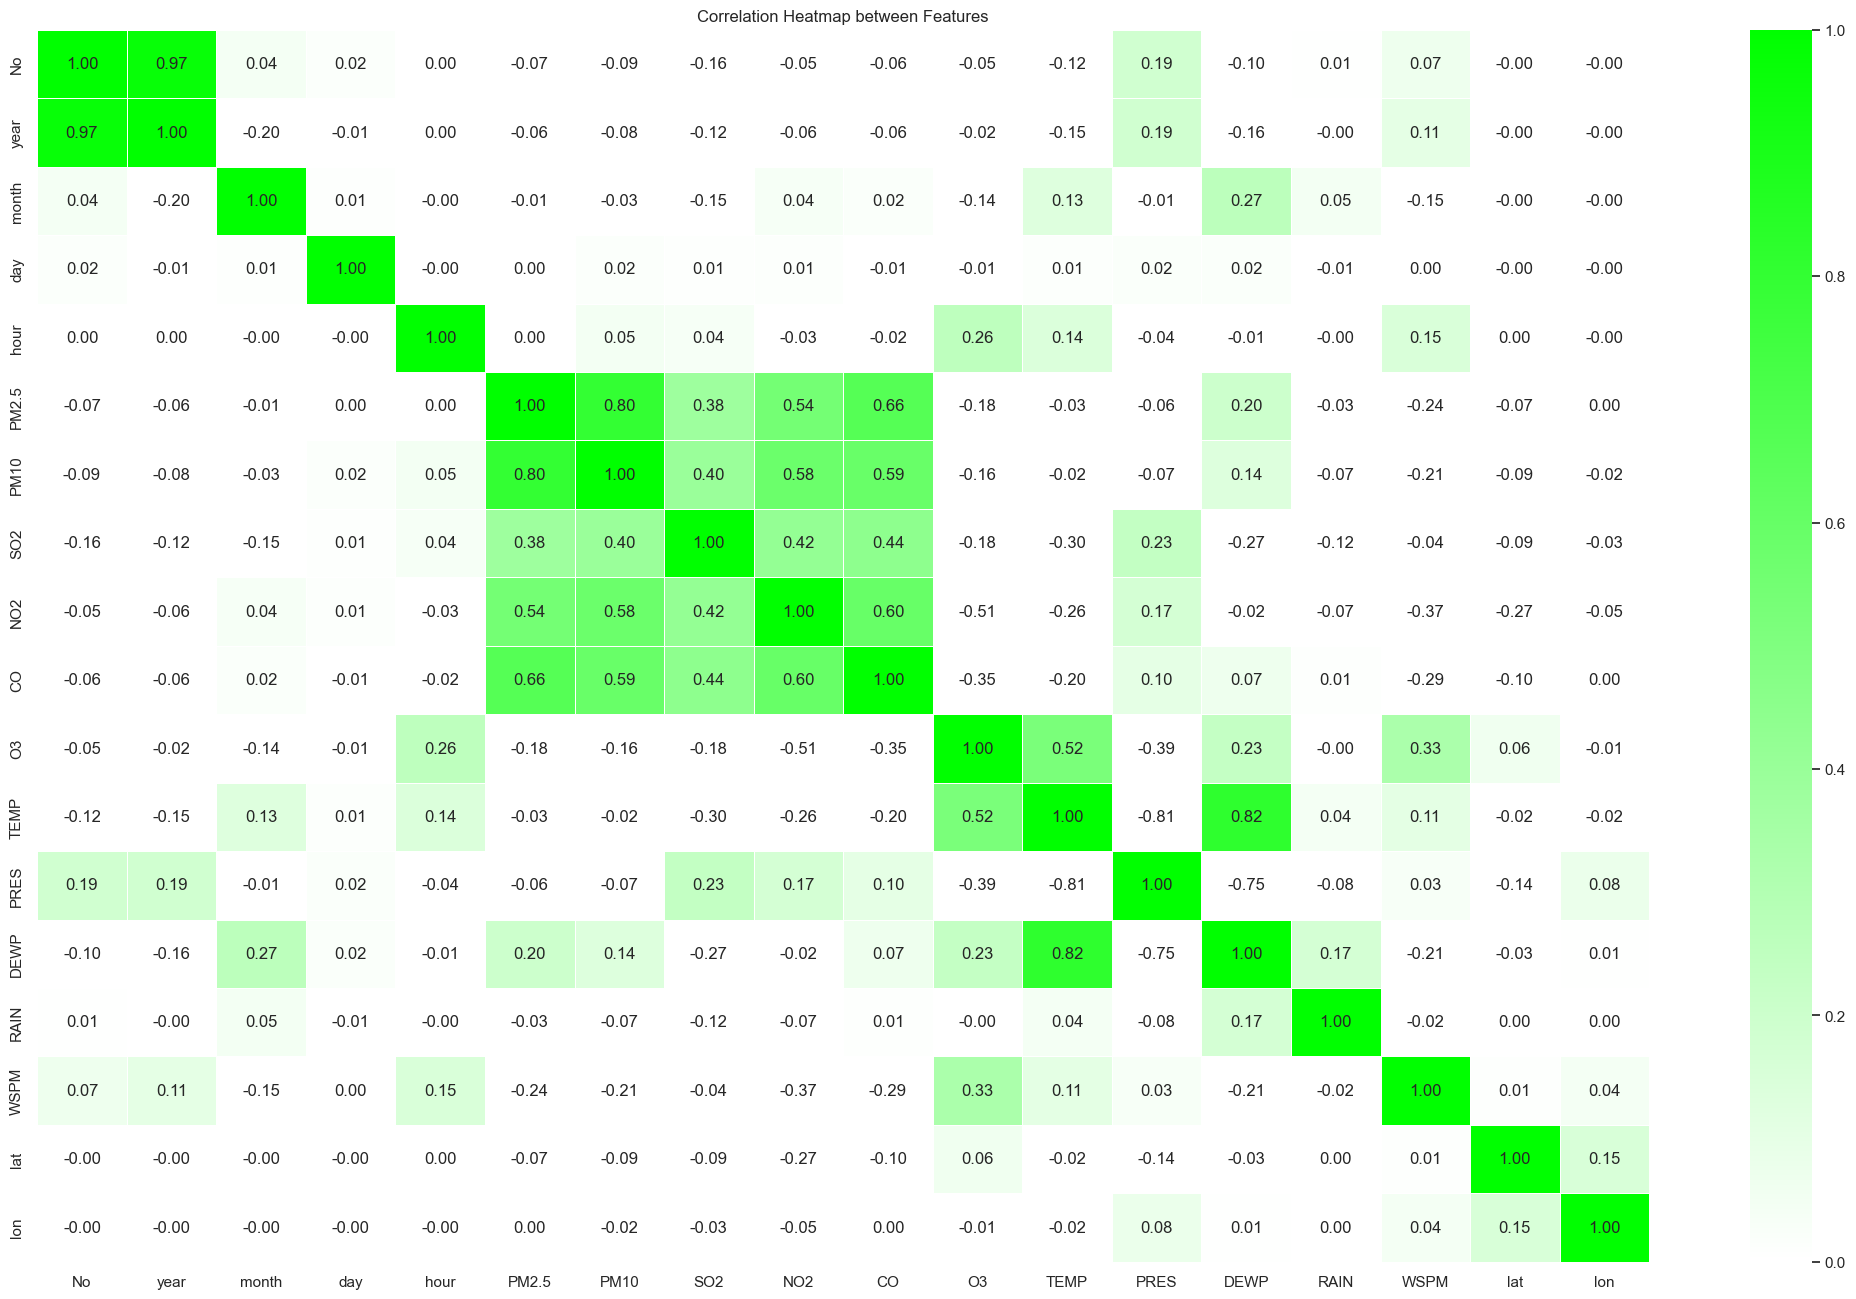

In [40]:
# Calculate the correlation matrix between features
correlation_matrix = air_quality.corr(numeric_only=True)

colors = [(1, 1, 1), (0, 1, 0)]  # White to green
cmap = LinearSegmentedColormap.from_list("custom", colors)

# Plot heatmap with custom colormap
plt.figure(figsize=(26, 16))
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=.5, vmin=0, vmax=1)
plt.title('Correlation Heatmap between Features')
plt.show()

Based on the visualization above there are some key insight that we can get:
1. PM2.5 and PM10 are highly correlated
2. O3 has negative correlation with other pollutants column
3. SO2, NO2 and CO have moderate correlation with every other pollutant column except for O3
4. RAIN has negative correlation with every pollutant column

## Conclusion

- **Question 1 Conclusion:**<br>
Based on the exploratory data analysis and visualizations, I observed that the air quality across all stations in the dataset is quite similar. This is likely because the stations are relatively close to each other, as shown on the geomap. Given their cation, they experience similar environmental conditions and sources of pollution. Additionally, most of the stations fall under the "moderate pollution" category, which could be influenced by China’s rapid industrialization, where both urban areas and nearby regions are exposed to industrial and vehicular emissions.

- **Question 2 Conclusion:**<br>
Based on the exploratory data analysis and data visualization I've made, I can conclude that there are several factors that affect air quality and those are PM2.5, PM10, CO, SO2, NO2, O3, and rainfall (RAIN). How each factor correlate with each other for every pollutant except for O3 they correlate positively with each other and each of them have moderate correlation for each other. So basically that means, if one of those pollutant is high in value there's a high chance that other pollutant is also high in value and vice versa. However they have a negative correlation with the RAIN value because rain generally helps to clean the air by reducing the level of all pollutants if the rainfall is high. The fact that rainfall was low from 2013 to 2017 could explain why air quality stayed in the moderate pollution range—without significant rain to wash away pollutants, they accumulated in the air.

In [41]:
air_quality.to_csv('all_data.csv', index=False)